In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline


In [2]:
# Read the CSV file
file_path = "training.1600000.processed.noemoticon.csv"
try:
    df = pd.read_csv(file_path, encoding="ISO-8859-15", names=['Target', 'ID', 'Date', 'Flag', 'User', 'Text'])
except Exception as e:
    print(f"Error reading CSV file: {e}")
    raise

In [3]:
# Check for missing values
if df.isnull().any().any():
    print("Warning: Missing values detected in the dataset.")


In [4]:
# Use only the first 10 rows
df_subset = df.sample(n=10, random_state=42).copy()

In [5]:
# Split the data into features (X) and target (y)
X_subset = df_subset['Text']
y_subset = df_subset['Target']

In [6]:
# Split the data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [7]:
# Create a pipeline with a TF-IDF vectorizer and a Decision Tree classifier
model_subset = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(random_state=42))

In [8]:
# Fit the model on the training data
model_subset.fit(X_train_subset, y_train_subset)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [9]:
# Make predictions on the test data
y_pred_subset = model_subset.predict(X_test_subset)

In [10]:
# Evaluate the accuracy of the model
accuracy_subset = accuracy_score(y_test_subset, y_pred_subset)
print(f"Accuracy on subset: {accuracy_subset * 100:.2f}%")

Accuracy on subset: 100.00%


In [11]:
# Display the confusion matrix
conf_matrix_subset = confusion_matrix(y_test_subset, y_pred_subset)
print("Confusion Matrix on subset:")
print(conf_matrix_subset)

Confusion Matrix on subset:
[[2]]


In [12]:
# Display the first 10 rows along with predictions
df_subset['Predicted'] = model_subset.predict(X_subset)
print(df_subset[['Text', 'Target', 'Predicted']])

                                                      Text  Target  Predicted
541200              @chrishasboobs AHHH I HOPE YOUR OK!!!        0          0
750      @misstoriblack cool , i have no tweet apps  fo...       0          0
766711   @TiannaChaos i know  just family drama. its la...       0          0
285055   School email won't open  and I have geography ...       0          0
705995                              upper airways problem        0          0
379611          Going to miss Pastor's sermon on Faith...        0          0
1189018            on lunch....dj should come eat with me        4          4
667030    @piginthepoke oh why are you feeling like that?        0          0
93541      gahh noo!peyton needs to live!this is horrible        0          0
1097326  @mrstessyman thank you glad you like it! There...       4          4


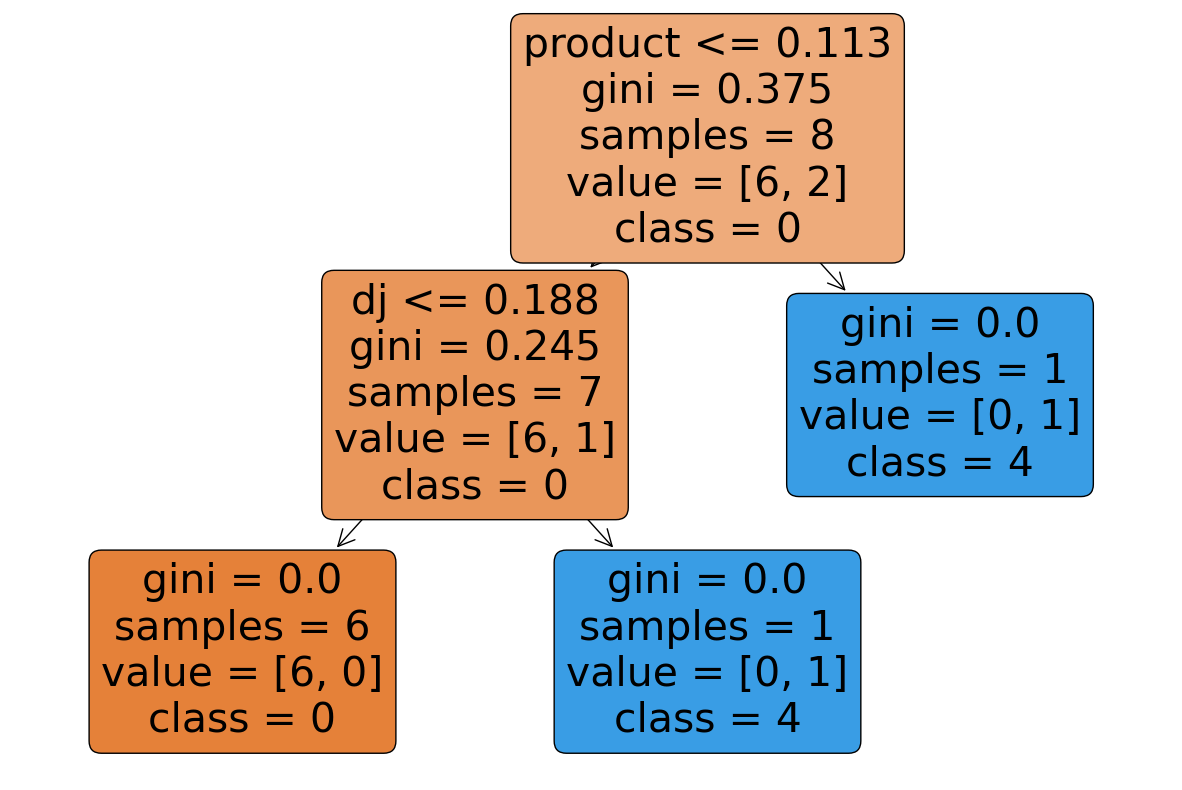

In [14]:
# Display the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model_subset.named_steps['decisiontreeclassifier'], feature_names=model_subset.named_steps['tfidfvectorizer'].get_feature_names_out(), class_names=['0', '4'], filled=True, rounded=True)
plt.show()